In [1]:
import importlib
import shiftNMF_frozen
importlib.reload(shiftNMF_frozen)
from shiftNMF_frozen import ShiftNMF
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
import Hardmodel
importlib.reload(Hardmodel)
from Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools

import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

# shiftNMF

[5.99978451 5.99915313 5.99852176 ... 0.50114961 0.50051823 0.49988686]
1.64330490918214
1.2644805964802792


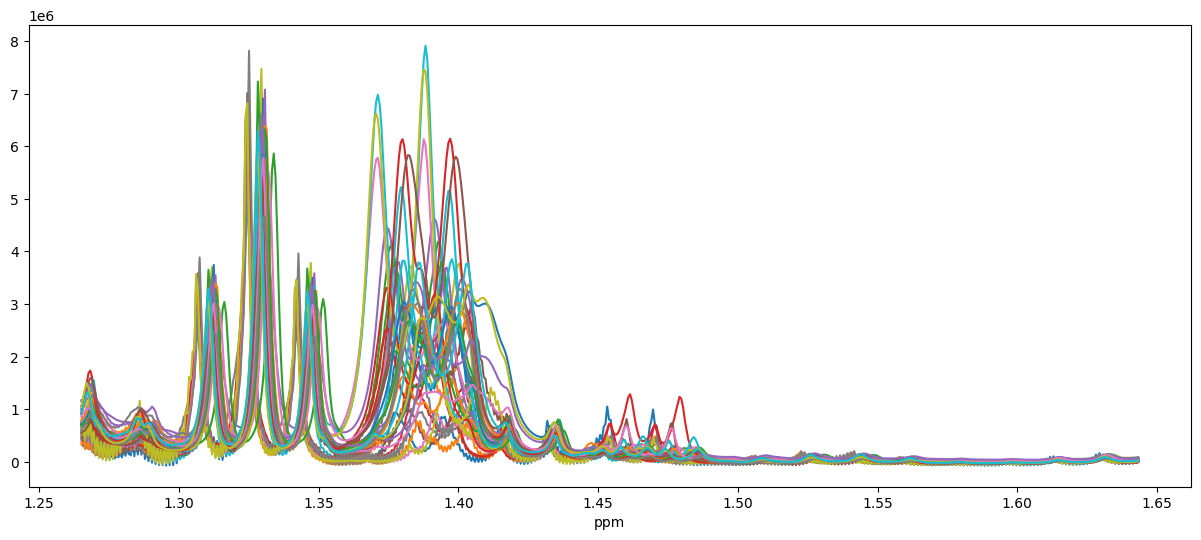

In [2]:
# 1.3-1.6
si = 6900
ei = 7500


print(PPM_WINE)
X = X_WINE[:,si:ei]
print(PPM_WINE[si])
print(PPM_WINE[ei])
ppm = PPM_WINE[si:ei]
plt.figure(figsize=(15,6))
plt.plot(ppm,X.T)
plt.xlabel("ppm")
plt.show()

epoch: 300, Loss: 0.049843199920299674, Tau: 991.56795026866422


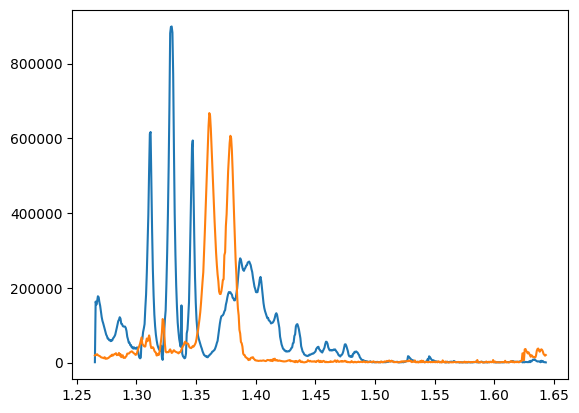

In [3]:

nmf = ShiftNMF(X, 2, lr=0.1, alpha=1e-6, min_imp=0.001)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=300, tau_iter=0, Lambda=0.000)
plt.plot(ppm,H_est.T)
plt.show()


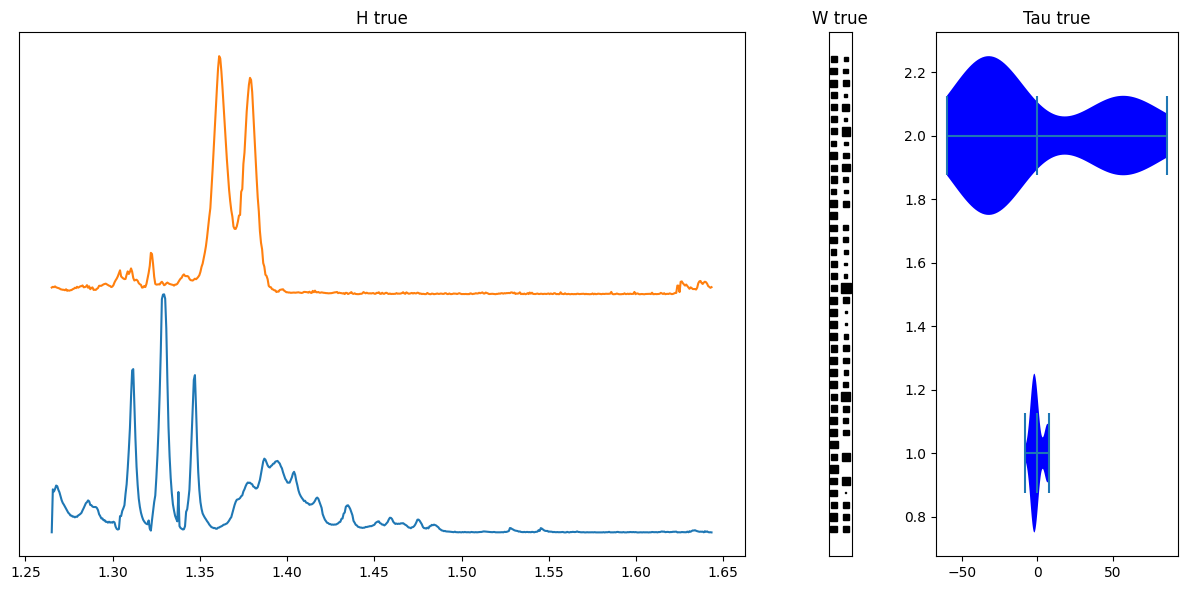

In [4]:
from helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

fig = plt.figure(figsize=(12, 6))
N, M = X[:,0:3000].shape
H_scaled = np.zeros_like(H_est)
for i, vec in enumerate(H_est):
    H_scaled[i] = vec/max(vec)

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, ppm, H_scaled.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

# Hardmodel

Found peaks:[379 394 406 421 469 497 525]
sigma: 4.610856752897737 n:2.7628623080750354e-07
sigma: 8.811381568410935 n:8.876786162703699e-08
sigma: 10.59834945249353 n:0.9999995468177381
sigma: 7.195526009647873 n:0.27832315144540587
sigma: 3.0446815722266205 n:0.5569598764681966
sigma: 3.154699867749021 n:1.909277241798734e-07
sigma: 3.381971840459398 n:0.5930904698489321
Lorentzian %:ss: 0.12073376904981271
tensor([3.1310e-07, 9.8775e-08, 1.0000e+00, 9.1237e-01, 6.0510e-01, 5.4678e-08,
        7.6906e-01], grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([13.8751, 13.8310, 16.5279, 10.6976,  3.1634,  3.3843,  3.5328],
       requires_grad=True)
hypothesises:
{(0, 1, 4, 5), (0, 1, 6), (0, 5), (1, 2, 4, 6), (0, 1, 2, 4, 5), (0, 2, 4, 6), (3, 4, 5, 6), (2, 4, 5), (0, 2, 4), (0, 1, 5, 6), (3, 6), (0, 3, 5), (2, 3, 4, 5, 6), (0, 1, 4, 5, 6), (2, 4), (0, 2, 6), (0, 2, 3, 4, 6), (0, 1, 2, 3), (1, 2, 3, 5, 6), (1, 3, 5, 6), (6,), (0, 1, 3, 4, 6), (0, 1, 2, 3, 4, 5, 6), (1, 3, 

c:\Bachelorprojekt\helpers\fit_functions.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=4.79442e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


epoch: 1, Loss: 0.15388378956329185
epoch: 2, Loss: 0.15388378956329185
FINAL FOUND VALUES
means:
[438.  497.  424.  452.  459.5 451.5 448.5]
means in ppm
[1.3667631609097812, 1.329512103494098, 1.3756023948728249, 1.3579239269467376, 1.3535043099652162, 1.3585553008012408, 1.3604494223647503]
sigmas:
[8.629727 3.360185 8.519271 8.703993 8.681921 9.956087 7.817245]
J coupling:
[118.  28.  90. 146. 131.  91.  42.]
coupling in ppm
[0.0745021148313656, 0.017678467926086405, 0.05682364690527919, 0.09218058275745289, 0.08270997493990606, 0.05745502075978237, 0.026517701889130052]
multiplicity
[2 3 2 2 2 2 4]
N
[1.3084220e-07 6.4920667e-03 6.9217087e-04 1.0200737e-03 5.7320343e-04
 3.1901187e-01 6.0029853e-02]
W:
[[0.         0.         0.8565907  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.      

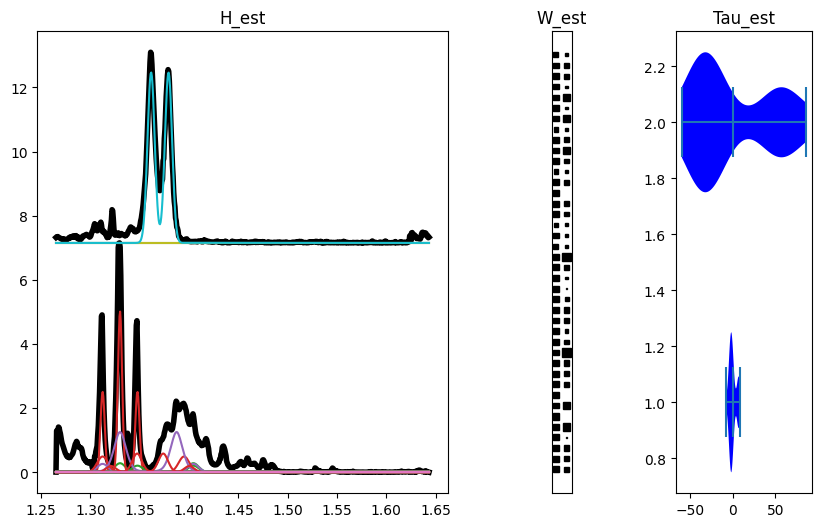

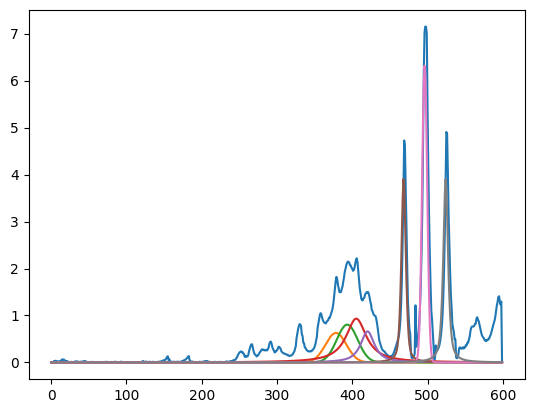

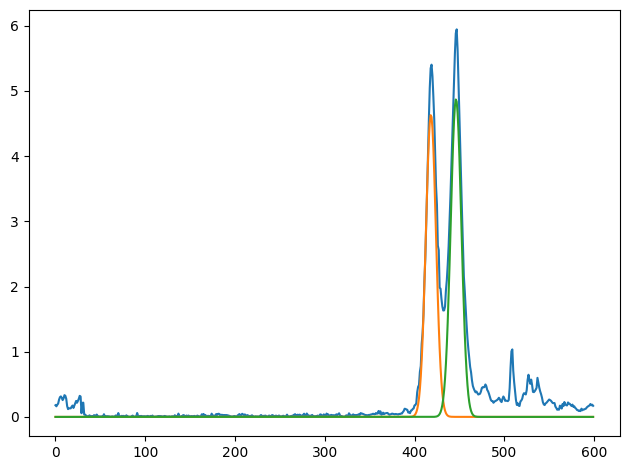

In [5]:
from helpers.plot import *
fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []
losses = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], min_height=2/10, min_sigma=1, lr=0.1 , plot=True)
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)

    W, C, running_loss, path, lambdas, loss = hardmodel.fit(threshold=0.25, verbose=True, return_loss=True)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    losses.append(loss)
    means, sigma, j_coup, mult, n = hardmodel.return_values()
    print("FINAL FOUND VALUES")
    print("means:")
    print(means)
    print("means in ppm")
    print([ppm[int(m)] for m in means])
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("coupling in ppm")
    print([ppm[0]-ppm[int(m)] for m in j_coup])
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(ppm,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(ppm,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[1.0, 0.9993537240225427, 0.9840088607586526, 0.6717630927257349, 0.5722356256991175, 0.5633784664818045, 0.5159833356024391, 0.5145929189041483, 0.5099950392132382, 0.4365340041081991, 0.4128042116954392, 0.4127278093261839, 0.40585642333229194, 0.4053519423205669, 0.4023869115291851, 0.39856403168413046, 0.3817081459262975, 0.3747595557820812, 0.37448554361440395, 0.3631383086522338, 0.35311302698359365, 0.3530469797580007, 0.3528473101327728, 0.3481063857828185, 0.3447102446401296, 0.33023804110232347, 0.322458500810911, 0.31795137794324707, 0.3152073283651624, 0.314879866761541, 0.3107185940295547, 0.3097959037218554, 0.30946315255647855, 0.30818512786088526, 0.30425057117833504, 0.3038317131472288, 0.30378067040164325, 0.3035901710849396, 0.30313937453540996, 0.3025536678857949, 0.30033359728094067, 0.2999628321451161, 0.2995112825569793, 0.29940275407141226, 0.2993069531706119, 0.297811900692957, 0.29714356250091806, 0.2965308563178624, 0.29652660099026706, 0.29651933800667046]
[

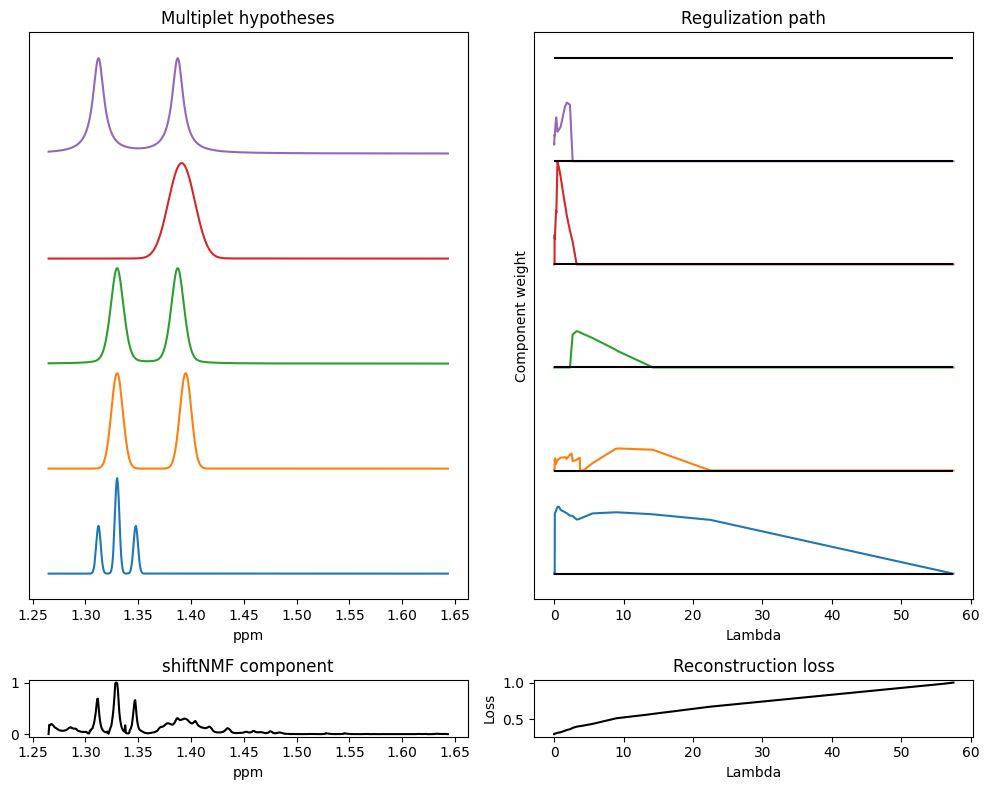

[1.0, 0.23162971603052346, 0.2173934594379519, 0.21553304322034306, 0.21553232494913613]
[2 1 0]


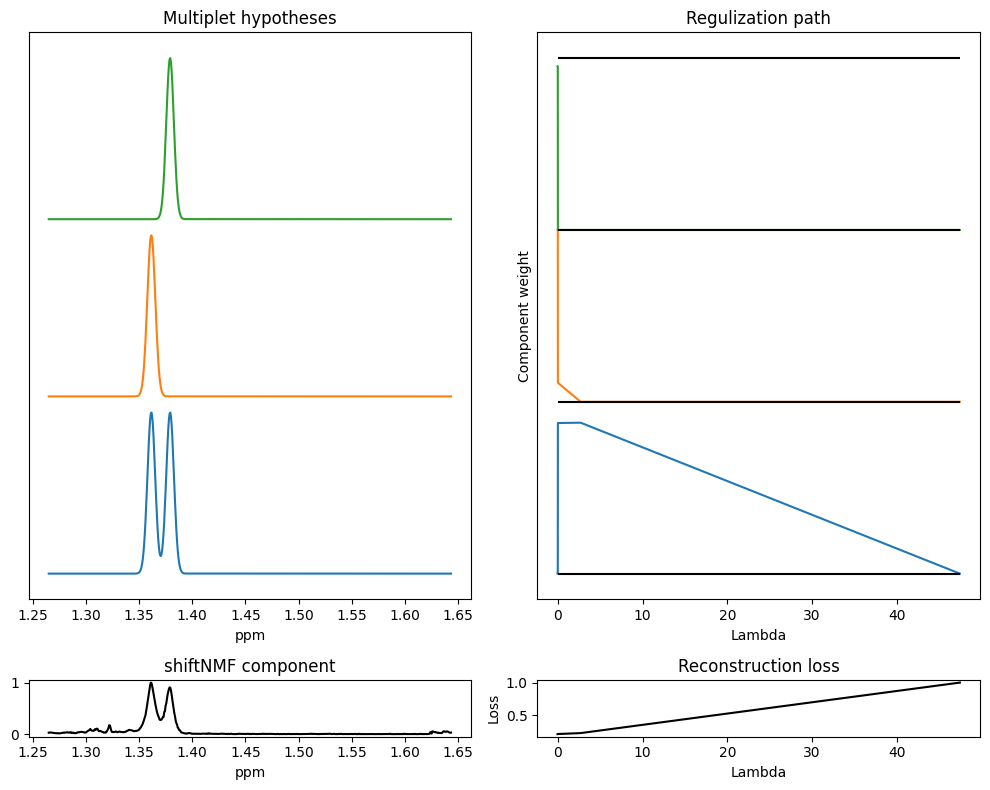

In [8]:

for i in range(len(reg_paths)):
    path = reg_paths[i][0]
    lambdas = lambda_axis[i][0]
    C = C_path[i]
    loss = losses[i]
    print(loss)
    fig = plt.figure(figsize=(10, 8))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regularization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ax3 = plt.subplot(gs[2])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax3.set_title('shiftNMF component')
    ax3.plot(ppm, H_est[i]/max(H_est[i]), color="k")
    ax3.set_xlabel("ppm")

    ax4 = plt.subplot(gs[3])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax4.set_title('Reconstruction loss')
    ax4.plot(lambdas, loss, color="k")
    ax4.set_xlabel("Lambda")
    ax4.set_ylabel("Loss")

   
    sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
    print(sort_indices)
    path = path[sort_indices]
    C = C[sort_indices]

    ymax = 1.1
    yoffset = ymax
    t = 0

    nr_of_components = min(5,len(C))

    for j in range(nr_of_components):
            ax1.plot(ppm,C[j]/max(C[j])+yoffset*t)
            t += 1

    
    ymax = path[:nr_of_components].max()
    yoffset = ymax
    t = 0
    for j in range(nr_of_components):
            ax2.plot(lambdas,path[j]+yoffset*t)
            ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")


    plt.tight_layout()
    plt.show()